In [126]:
import numpy as np 
import pandas as pd 

import os, glob
from tqdm import tqdm 

from statsmodels.tsa.statespace.sarimax import SARIMAX 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 

from sklearn.metrics import mean_squared_error 
from statsmodels.tools.eval_measures import rmse 

import matplotlib.pyplot as plt 

%matplotlib inline 

In [127]:
df = pd.read_csv(glob.glob(os.getcwd() + '/*.csv')[0]) # monthly-beer-production-in-austr.csv 

In [128]:
df.head()

,Month,Monthly beer production
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    476 non-null    object 
 1   Monthly beer production  476 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.6+ KB


In [130]:
# object -> date
df.Month = pd.to_datetime(df.Month)

df = df.set_index('Month')

In [131]:
# 1956-01 -> 1956-01-01
# MS, QS, AS, D, etc.
df.index.freq = 'MS'


In [132]:
df

,Monthly beer production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9
...,...
1995-04-01,127.0
1995-05-01,151.0
1995-06-01,130.0


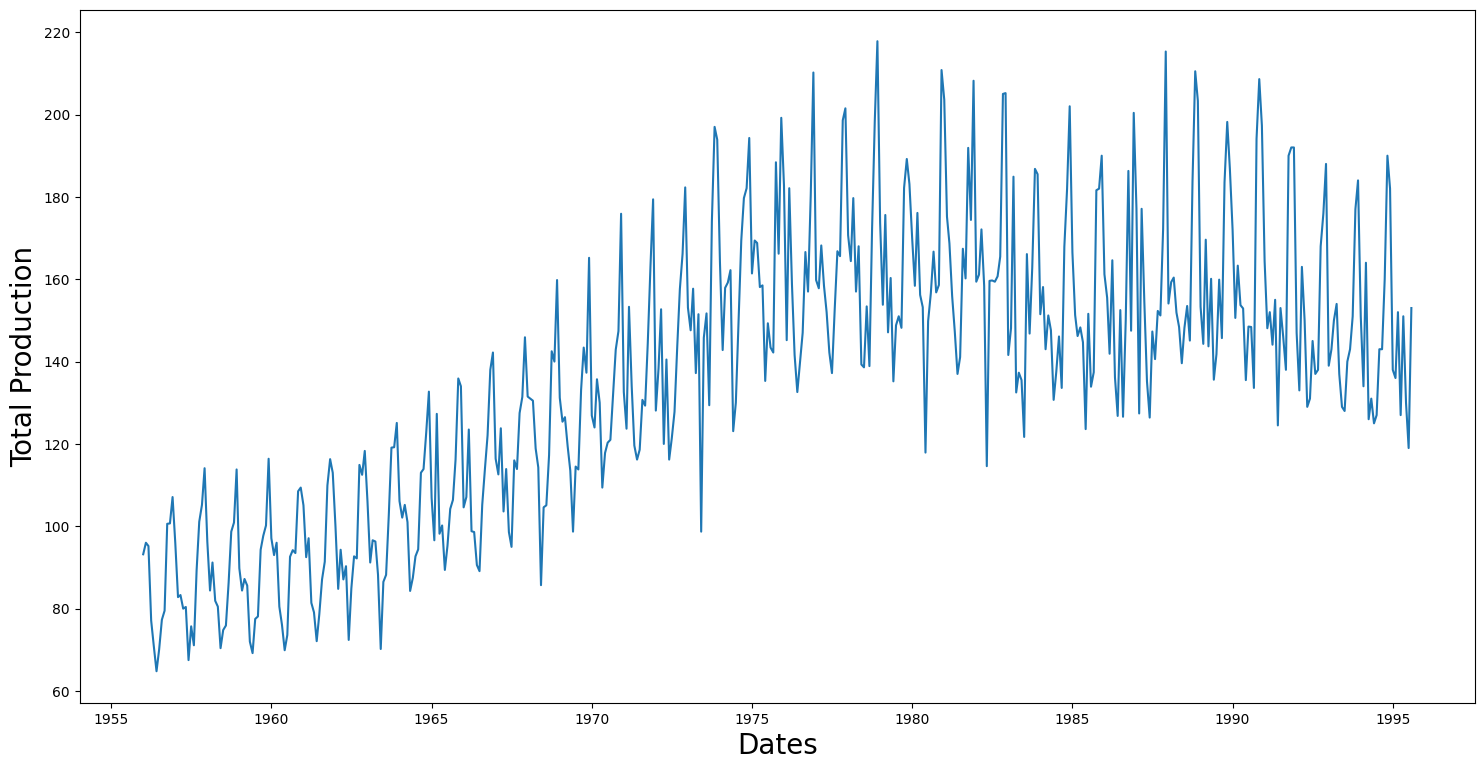

In [133]:
plt.figure(figsize=(18, 9))
plt.plot(df.index, df['Monthly beer production'], linestyle='-')
plt.xlabel('Dates', size=20)
plt.ylabel('Total Production', size=20)
plt.show();

### SARIMA

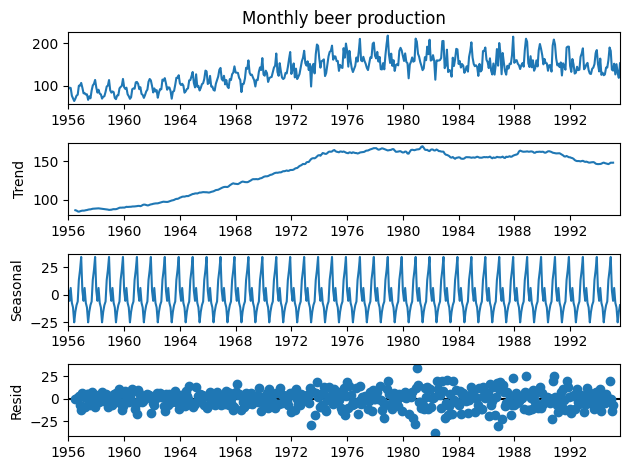

In [134]:
a = seasonal_decompose(df['Monthly beer production'], model = 'add')
a.plot();

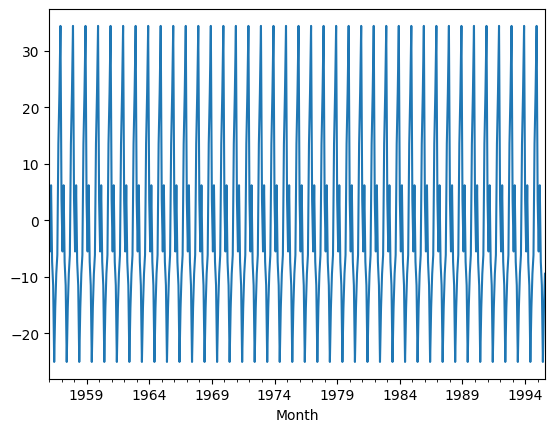

In [135]:
a.seasonal.plot();

In [136]:
train_df = df[:len(df) - 12]
test_df = df[len(df)-12:]

arima_model = SARIMAX(train_df['Monthly beer production'], order=(2, 1, 1), seasonal_order = (4, 0, 3, 12))
arima_results = arima_model.fit()
arima_results.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.11947D+00    |proj g|=  1.61673D-01


 This problem is unconstrained.



At iterate    5    f=  4.02339D+00    |proj g|=  4.51168D-02

At iterate   10    f=  3.79643D+00    |proj g|=  5.25952D-02

At iterate   15    f=  3.75388D+00    |proj g|=  5.35698D-02

At iterate   20    f=  3.71377D+00    |proj g|=  1.14027D-02

At iterate   25    f=  3.71149D+00    |proj g|=  2.22322D-02

At iterate   30    f=  3.70515D+00    |proj g|=  1.13734D-01

At iterate   35    f=  3.68967D+00    |proj g|=  5.51302D-02

At iterate   40    f=  3.68237D+00    |proj g|=  1.71952D-02

At iterate   45    f=  3.68153D+00    |proj g|=  8.30303D-03


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  3.68134D+00    |proj g|=  6.02767D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     59      1     0     0   6.028D-03   3.681D+00
  F =   3.6813359651981061     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


<class 'statsmodels.iolib.summary.Summary'>
"""
                                         SARIMAX Results                                          
==================================================================================================
Dep. Variable:                    Monthly beer production   No. Observations:                  464
Model:             SARIMAX(2, 1, 1)x(4, 0, [1, 2, 3], 12)   Log Likelihood               -1708.140
Date:                                    Thu, 13 Apr 2023   AIC                           3438.280
Time:                                            10:19:22   BIC                           3483.795
Sample:                                        01-01-1956   HQIC                          3456.198
                                             - 08-01-1994                                         
Covariance Type:                                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1222      0.035     -3.495      0.000      -0.191      -0.054
ar.L2         -0.1685      0.036     -4.616      0.000      -0.240      -0.097
ma.L1         -0.8431      0.026    -32.736      0.000      -0.894      -0.793
ar.S.L12       1.7495      0.112     15.680      0.000       1.531       1.968
ar.S.L24      -1.5953      0.204     -7.816      0.000      -1.995      -1.195
ar.S.L36       0.7764      0.153      5.074      0.000       0.477       1.076
ar.S.L48       0.0681      0.057      1.205      0.228      -0.043       0.179
ma.S.L12      -1.5515      0.123    -12.564      0.000      -1.794      -1.309
ma.S.L24       1.3816      0.194      7.106      0.000       1.000       1.763
ma.S.L36      -0.6563      0.108     -6.100      0.000      -0.867      -0.445
sigma2        84.9023      4.896     17.342      0.000      75.307      94.498
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                40.96
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               4.06   Skew:                            -0.30
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [137]:
arima_pred = arima_results.predict(start = len(train_df), end = len(df) -1, typ='levels').rename('ARIMA Predictions')
arima_pred 

1994-09-01    134.122932
1994-10-01    157.748335
1994-11-01    181.568019
1994-12-01    183.635914
1995-01-01    144.944600
1995-02-01    136.943950
1995-03-01    151.253394
1995-04-01    133.334570
1995-05-01    137.843868
1995-06-01    120.671167
1995-07-01    128.444949
1995-08-01    138.885038
Freq: MS, Name: ARIMA Predictions, dtype: float64

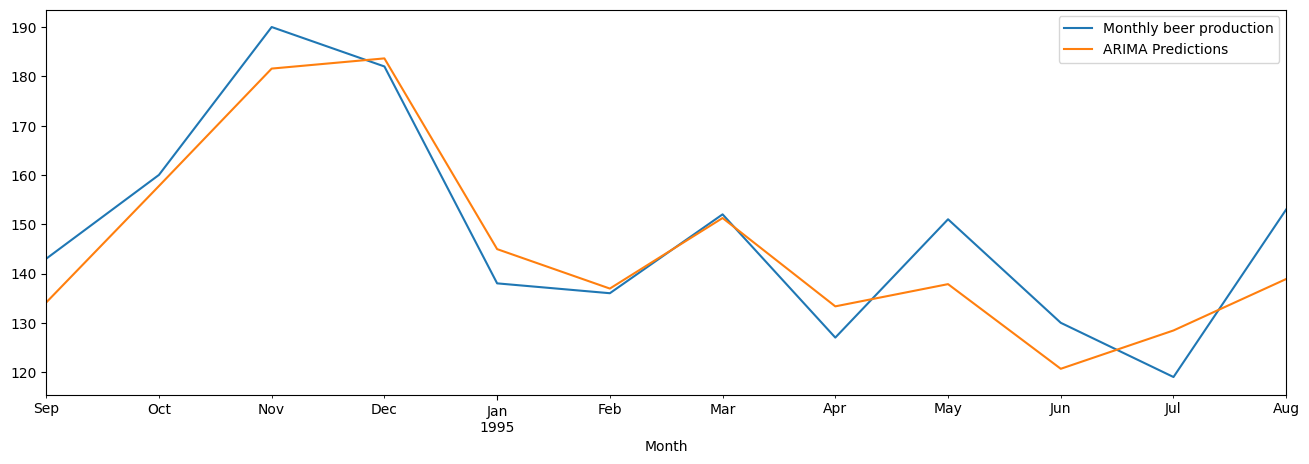

In [138]:
test_df['Monthly beer production'].plot(figsize=(16, 5), legend=True)
arima_pred.plot(legend=True);

In [139]:
arima_rmse = rmse(test_df['Monthly beer production'], arima_pred)
arima_mse = arima_rmse ** 2
mean_value = df['Monthly beer production'].mean()

print(f'MSE Error: {arima_mse:^10.4f}\nRMSE Error: {arima_rmse:^10.4f}\nMean: {mean_value:^10.4f}')

MSE Error:  66.3333  
RMSE Error:   8.1445  
Mean:  136.3954 


### LSTM Forecast 

In [140]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(train_df)

scaled_train_df = scaler.transform(train_df)
scaled_test_df = scaler.transform(test_df)

In [141]:
from torch import nn, optim 
import torch 

from torch.utils.data import Dataset, DataLoader 

In [211]:
class args:
    input_dim = 12
    hidden_dim = 100
    num_layers = 2
    lr = 1e-4
    num_epochs = 200
    
    
    device = 'mps' if torch.backends.mps.is_available() else 'cpu'


In [212]:
args.device = 'cpu'

In [213]:
class ForecastDataset(Dataset):
    def __init__(self, args, df):
        xs, gts = [], []
        
        for idx in range(0, len(df)-(args.input_dim)):
            
            x = df[idx:idx + args.input_dim].flatten()
            gt = df[idx + args.input_dim].flatten()
            
            xs.append(x)
            gts.append(gt)
            
        self.x = xs 
        self.gt = gts
        
    def __len__(self):
        return len(self.gt)
    
    def __getitem__(self, idx):
        return {
            'input': torch.tensor(self.x[idx], dtype=torch.float32), 
            'labels': torch.tensor(self.gt[idx], dtype=torch.float32)
        }

In [214]:
train_set = ForecastDataset(args, scaled_train_df)
train_loader = DataLoader(train_set, batch_size=128, shuffle=False)

In [215]:
class LSTM(nn.Module):
    def __init__(self, args):
        super(LSTM, self).__init__()
        self.input_dim = args.input_dim 
        self.hidden_dim = args.hidden_dim 
        self.num_layers = args.num_layers 
        
        self.lstm = nn.LSTM(self.input_dim, self.hidden_dim, self.num_layers, batch_first=True, dropout=0.1)
        self.fc_layer = nn.Linear(self.hidden_dim, 1)
        
        self._init_weight()
    

    def forward(self, x):
        o, (h, c) = self.lstm(x)
        outs = self.fc_layer(o)
        return outs 
    
    
    def _init_weight(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.normal_(m.weight)
                nn.init.zeros_(m.bias)
        

In [216]:
model = LSTM(args).to(args.device)
optimizer = optim.Adam(model.parameters(), lr=args.lr)
criterion = nn.MSELoss().to(args.device)

In [217]:
iterator = tqdm(range(1, args.num_epochs+1), desc='Training', total=len(train_loader))

for epoch in iterator:
    best_loss = float('inf')
    train_loss = 0.0
    model.train()
    iterator.set_description(f'Epoch-{epoch}')
    for batch in train_loader:

        
        input_x = batch['input'].to(args.device)
        gt = batch['labels'].to(args.device)
        
        pred_y = model(input_x)
        
        loss = criterion(gt, pred_y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_loss /= len(train_loader.dataset)
    
    
    
    iterator.set_postfix(loss=train_loss)

Epoch-200: : 200it [00:36,  5.45it/s, loss=5.75e-5]                  


In [218]:
def inference(batch):
    model.eval()
    with torch.no_grad():
        x = batch['input'][-1].unsqueeze(0)
        preds = []    
        for _ in range(len(test_df)):

            pred_y = model(x)
            
            preds.append(pred_y.squeeze(0))
            
            x = torch.cat([x, pred_y], dim=1)[:, 1:]
        preds = torch.stack(preds)
        
    pred_y = np.array(preds)
    pred_y = scaler.inverse_transform(pred_y)
    
    return pred_y 

In [219]:
pred_y = inference(batch)

In [220]:
test_df['LSTM_Predictions'] = pred_y

/var/folders/tc/njz6qrqj7vlfbvw00wthj9059kp7wt/T/ipykernel_4810/1469208861.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['LSTM_Predictions'] = pred_y


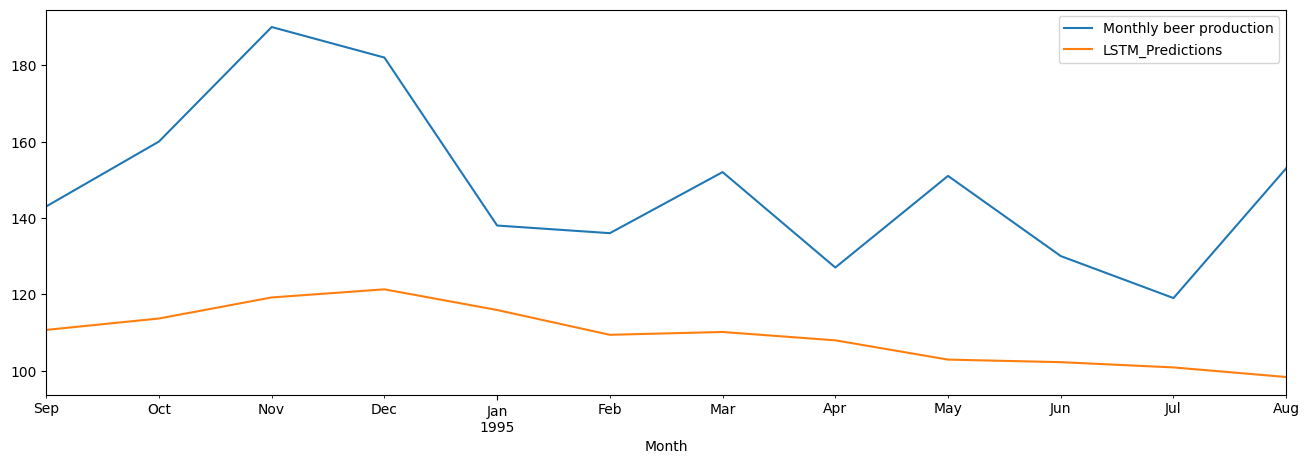

In [221]:
test_df['Monthly beer production'].plot(figsize=(16, 5), legend=True)
test_df['LSTM_Predictions'].plot(legend=True);